<a href="https://colab.research.google.com/github/Riley-19282/Permafrost_Research/blob/main/Standardized_GasBench_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from google.colab import files
import io
from sklearn.metrics import r2_score

# !pip install openpyxl==3.1.2

#correcting data

In [ ]:
#upload raw data file
uploaded = files.upload()

Saving 5-2-25 sample run raw.xlsx to 5-2-25 sample run raw.xlsx


In [ ]:
#parse raw data file
rawData = pd.read_excel('5-2-25 sample run raw.xlsx')  #remember to change to match uploaded file

rawData


/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Row,Identifier 1,Identifier 2,Comment,Peak Nr,Area All,Ampl 44,Ampl 45,Ampl 46,Area 44,d 13C/12C,d 18O/16O,Information,Date,Time,Time Code,BGD 44,BGD 45,BGD 46
0,1,blank,NaN,NaN,1,192.940,9944,11727,13697,189.915,-19.929,24.423,Peak Center found at (61943);Inject Sample No 1,05/02/25,16:19:52,2025/05/02 16:19:52,2.9,4.1,7.3
1,1,blank,NaN,NaN,2,193.957,9977,11769,13748,190.916,-19.937,24.418,Peak Center found at (61943);Inject Sample No 1,05/02/25,16:19:52,2025/05/02 16:19:52,7.7,9.8,14.3
2,1,blank,NaN,NaN,3,17.251,311,366,400,16.993,-18.014,-143.058,Peak Center found at (61943);Inject Sample No 1,05/02/25,16:19:52,2025/05/02 16:19:52,8.6,11.0,108.9
3,1,blank,NaN,NaN,4,249.987,4454,5302,6351,246.016,-11.837,52.721,Peak Center found at (61943);Inject Sample No 1,05/02/25,16:19:52,2025/05/02 16:19:52,6.7,8.7,53.4
4,1,blank,NaN,NaN,5,192.867,9944,11727,13697,189.844,-20.070,24.491,Peak Center found at (61943);Inject Sample No 1,05/02/25,16:19:52,2025/05/02 16:19:52,5.5,7.2,15.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,88,blank,NaN,NaN,2,191.162,9828,11596,13511,188.165,-19.937,24.418,Peak Center found at (61963);Inject Sample No 88,05/06/25,07:42:50,2025/05/06 07:42:50,9.8,12.1,45.8
526,88,blank,NaN,NaN,3,53.375,918,1085,288,52.733,32.440,-907.217,Peak Center found at (61963);Inject Sample No 88,05/06/25,07:42:50,2025/05/06 07:42:50,27.0,33.0,1383.4
527,88,blank,NaN,NaN,4,44.277,783,928,0,43.758,53.821,-997.838,Peak Center found at (61963);Inject Sample No 88,05/06/25,07:42:50,2025/05/06 07:42:50,32.4,39.2,1778.6
528,88,blank,NaN,NaN,5,186.574,9612,11341,13235,183.648,-19.954,25.709,Peak Center found at (61963);Inject Sample No 88,05/06/25,07:42:50,2025/05/06 07:42:50,3.3,4.6,94.5


In [ ]:
#filter for CH4 peak (peak 3)
CH4_data = rawData[rawData['Peak Nr']==3]

#filter for CO2 peak (peak 4)
CO2_data = rawData[rawData['Peak Nr']==4]

# CH4_data.head()
CO2_data

,Row,Identifier 1,Identifier 2,Comment,Peak Nr,Area All,Ampl 44,Ampl 45,Ampl 46,Area 44,d 13C/12C,d 18O/16O,Information,Date,Time,Time Code,BGD 44,BGD 45,BGD 46
3,1,blank,NaN,NaN,4,249.987,4454,5302,6351,246.016,-11.837,52.721,Peak Center found at (61943);Inject Sample No 1,05/02/25,16:19:52,2025/05/02 16:19:52,6.7,8.7,53.4
9,2,blank,NaN,NaN,4,213.047,3522,4198,5004,209.663,-11.006,53.351,Peak Center found at (61963);Inject Sample No 2,05/02/25,17:20:08,2025/05/02 17:20:08,8.7,11.0,56.4
15,3,0.5mL mix,NaN,NaN,4,877.742,15866,18885,22254,863.839,-11.970,44.949,Peak Center found at (61963);Inject Sample No 3,05/02/25,18:20:23,2025/05/02 18:20:23,32.2,38.9,88.6
21,4,1mL mix,NaN,NaN,4,1490.700,26498,31536,36515,1467.178,-12.063,35.106,Peak Center found at (61973);Inject Sample No 4,05/02/25,19:20:38,2025/05/02 19:20:38,16.7,20.6,70.5
27,5,1.5mL mix,NaN,NaN,4,1995.868,34518,41092,48227,1964.284,-11.433,37.060,Peak Center found at (61943);Inject Sample No 5,05/02/25,20:20:54,2025/05/02 20:20:54,12.7,15.9,61.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,84,-40.81,NaN,NaN,4,1168.712,19672,22915,27032,1150.717,-33.291,-6.302,Peak Center found at (61963);Inject Sample No 84,05/06/25,03:41:45,2025/05/06 03:41:45,57.2,68.8,1207.2
509,85,blank,NaN,NaN,4,96.404,1753,2065,1703,95.081,-1.573,-468.002,Peak Center found at (61953);Inject Sample No 85,05/06/25,04:42:01,2025/05/06 04:42:01,30.7,37.7,1084.0
515,86,936,NaN,NaN,4,788.198,12487,14856,15981,775.932,-10.190,-26.641,Peak Center found at (61963);Inject Sample No 86,05/06/25,05:42:17,2025/05/06 05:42:17,17.3,19.1,2269.0
521,87,1039,NaN,NaN,4,1382.892,24388,28987,33319,1361.203,-12.200,6.736,Peak Center found at (61963);Inject Sample No 87,05/06/25,06:42:34,2025/05/06 06:42:34,23.9,24.2,1436.2


In [ ]:
#filter for blanks
#make sure all blanks are called 'blank' if any are called 'Blank' or 'blank flush' they will NOT be inculded
CO2_blanks = CO2_data[CO2_data['Identifier 1']=='blank']
CO2_blanks = CO2_blanks.iloc[1:]  #drops first blank CASE SENSITIVE

CH4_blanks = CH4_data[CH4_data['Identifier 1']=='blank']
CH4_blanks = CH4_blanks.iloc[1:] #drops first blank CASE SENSITIVE


#USE AS NEEDED - drop outliers
row_index_to_nan = 508, 526  #pick row using index column
column_name = 'Area All'
CH4_blanks.loc[row_index_to_nan, column_name] = np.nan

row_index_to_nan = 509, 527  #pick row using index column
column_name = 'Area All'
CO2_blanks.loc[row_index_to_nan, column_name] = np.nan

#visually see dataframes
# CH4_blanks
CO2_blanks

,Row,Identifier 1,Identifier 2,Comment,Peak Nr,Area All,Ampl 44,Ampl 45,Ampl 46,Area 44,d 13C/12C,d 18O/16O,Information,Date,Time,Time Code,BGD 44,BGD 45,BGD 46
9,2,blank,NaN,NaN,4,213.047,3522,4198,5004,209.663,-11.006,53.351,Peak Center found at (61963);Inject Sample No 2,05/02/25,17:20:08,2025/05/02 17:20:08,8.7,11.0,56.4
57,10,blank,NaN,NaN,4,191.756,3248,3863,4567,188.726,-11.725,34.021,Peak Center found at (61953);Inject Sample No 10,05/03/25,01:22:10,2025/05/03 01:22:10,7.1,9.2,69.0
153,26,blank,NaN,NaN,4,226.733,3739,4444,5252,223.151,-12.889,34.988,Peak Center found at (61953);Inject Sample No 26,05/03/25,17:26:17,2025/05/03 17:26:17,7.3,9.5,66.0
237,40,blank,NaN,NaN,4,200.493,3229,3838,4576,197.318,-13.390,44.718,Peak Center found at (61953);Inject Sample No 40,05/04/25,07:29:57,2025/05/04 07:29:57,7.1,9.3,50.5
309,52,blank,NaN,NaN,4,233.960,4081,4840,5739,230.270,-15.188,34.610,Peak Center found at (61953);Inject Sample No 52,05/04/25,19:33:06,2025/05/04 19:33:06,7.7,10.0,67.8
423,71,blank,NaN,NaN,4,198.345,3480,4143,4864,195.213,-12.202,36.441,Peak Center found at (61973);Inject Sample No 71,05/05/25,14:38:13,2025/05/05 14:38:13,7.1,9.3,59.0
509,85,blank,NaN,NaN,4,NaN,1753,2065,1703,95.081,-1.573,-468.002,Peak Center found at (61953);Inject Sample No 85,05/06/25,04:42:01,2025/05/06 04:42:01,30.7,37.7,1084.0
527,88,blank,NaN,NaN,4,NaN,783,928,0,43.758,53.821,-997.838,Peak Center found at (61963);Inject Sample No 88,05/06/25,07:42:50,2025/05/06 07:42:50,32.4,39.2,1778.6


In [ ]:
#find blank average

CO2_avg_blank = CO2_blanks['Area All'].mean()
CH4_avg_blank = CH4_blanks['Area All'].mean()

print(CO2_avg_blank)
print(CH4_avg_blank)

210.72233333333335
28.680666666666667


In [ ]:
#blank correct peak areas
CO2_blank_corr = CO2_data['Area All'] - CO2_avg_blank
CH4_blank_corr = CH4_data['Area All'] - CH4_avg_blank

# CO2_blank_corr
# CH4_blank_corr

#merge back to main dataframw
CO2_all = pd.merge(CO2_data, CO2_blank_corr, left_index=True, right_index=True)
CO2_all.rename(columns={'Area All_y': 'Blank Corrected Area'}, inplace=True)

CH4_all = pd.merge(CH4_data, CH4_blank_corr, left_index=True, right_index=True)
CH4_all.rename(columns={'Area All_y': 'Blank Corrected Area'}, inplace=True)

#these frames have the first blank but it's ok we drop it later
CO2_all
# CH4_all

,Row,Identifier 1,Identifier 2,Comment,Peak Nr,Area All_x,Ampl 44,Ampl 45,Ampl 46,Area 44,d 13C/12C,d 18O/16O,Information,Date,Time,Time Code,BGD 44,BGD 45,BGD 46,Blank Corrected Area
3,1,blank,NaN,NaN,4,249.987,4454,5302,6351,246.016,-11.837,52.721,Peak Center found at (61943);Inject Sample No 1,05/02/25,16:19:52,2025/05/02 16:19:52,6.7,8.7,53.4,39.264667
9,2,blank,NaN,NaN,4,213.047,3522,4198,5004,209.663,-11.006,53.351,Peak Center found at (61963);Inject Sample No 2,05/02/25,17:20:08,2025/05/02 17:20:08,8.7,11.0,56.4,2.324667
15,3,0.5mL mix,NaN,NaN,4,877.742,15866,18885,22254,863.839,-11.970,44.949,Peak Center found at (61963);Inject Sample No 3,05/02/25,18:20:23,2025/05/02 18:20:23,32.2,38.9,88.6,667.019667
21,4,1mL mix,NaN,NaN,4,1490.700,26498,31536,36515,1467.178,-12.063,35.106,Peak Center found at (61973);Inject Sample No 4,05/02/25,19:20:38,2025/05/02 19:20:38,16.7,20.6,70.5,1279.977667
27,5,1.5mL mix,NaN,NaN,4,1995.868,34518,41092,48227,1964.284,-11.433,37.060,Peak Center found at (61943);Inject Sample No 5,05/02/25,20:20:54,2025/05/02 20:20:54,12.7,15.9,61.4,1785.145667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,84,-40.81,NaN,NaN,4,1168.712,19672,22915,27032,1150.717,-33.291,-6.302,Peak Center found at (61963);Inject Sample No 84,05/06/25,03:41:45,2025/05/06 03:41:45,57.2,68.8,1207.2,957.989667
509,85,blank,NaN,NaN,4,96.404,1753,2065,1703,95.081,-1.573,-468.002,Peak Center found at (61953);Inject Sample No 85,05/06/25,04:42:01,2025/05/06 04:42:01,30.7,37.7,1084.0,-114.318333
515,86,936,NaN,NaN,4,788.198,12487,14856,15981,775.932,-10.190,-26.641,Peak Center found at (61963);Inject Sample No 86,05/06/25,05:42:17,2025/05/06 05:42:17,17.3,19.1,2269.0,577.475667
521,87,1039,NaN,NaN,4,1382.892,24388,28987,33319,1361.203,-12.200,6.736,Peak Center found at (61963);Inject Sample No 87,05/06/25,06:42:34,2025/05/06 06:42:34,23.9,24.2,1436.2,1172.169667


In [ ]:
#filter for conc standards
#make sure names are 'blank' '0.5mL mix', etc exactly or they won't be included
CO2_standards = CO2_all.loc[:, ['Row', 'Identifier 1', 'Peak Nr', 'Area All_x', 'd 13C/12C', 'Blank Corrected Area']]
CH4_standards = CH4_all.loc[:, ['Row', 'Identifier 1', 'Peak Nr', 'Area All_x', 'd 13C/12C', 'Blank Corrected Area']]

CO2_standards = CO2_standards[CO2_standards['Identifier 1'].isin(['blank', '0.5mL mix', '1mL mix', '1.5mL mix'])]
CH4_standards = CH4_standards[CH4_standards['Identifier 1'].isin(['blank', '0.5mL mix', '1mL mix', '1.5mL mix'])]

#add col for blank avg
CO2_standards['Blank Avg'] = CO2_avg_blank
CH4_standards['Blank Avg'] = CH4_avg_blank

CO2_standards = CO2_standards.iloc[1:]  #drops first blank
CH4_standards = CH4_standards.iloc[1:]  #drops first blank

#USE AS NEEDED
#drop any outlier
row_index_to_nan = 509, 527, 471, 478  #pick row using index column, if any blanks dropped (except the first) they need to be listed here too
column_name = 'Blank Corrected Area'
CO2_standards.loc[row_index_to_nan, column_name] = np.nan

row_index_to_nan = 508, 526, 470, 477  #pick row using index column, if any blanks dropped (except the first) they need to be listed here too
column_name = 'Blank Corrected Area'
CH4_standards.loc[row_index_to_nan, column_name] = np.nan

# CO2_standards
CH4_standards

,Row,Identifier 1,Peak Nr,Area All_x,d 13C/12C,Blank Corrected Area,Blank Avg
8,2,blank,3,18.556,-19.229,-10.124667,28.680667
14,3,0.5mL mix,3,638.887,-39.963,610.206333,28.680667
20,4,1mL mix,3,1301.744,-40.855,1273.063333,28.680667
26,5,1.5mL mix,3,1866.485,-40.986,1837.804333,28.680667
56,10,blank,3,29.254,-25.559,0.573333,28.680667
152,26,blank,3,30.586,-28.371,1.905333,28.680667
236,40,blank,3,30.386,-24.694,1.705333,28.680667
266,45,0.5mL mix,3,627.165,-40.055,598.484333,28.680667
272,46,1mL mix,3,1277.921,-40.636,1249.240333,28.680667
278,47,1.5mL mix,3,2022.855,-40.898,1994.174333,28.680667


In [ ]:
#map to known conc values

CO2_map = {'blank': 0, '0.5mL mix': 67.00892857, '1mL mix': 134.0178571, '1.5mL mix': 201.0267857}
CH4_map = {'blank': 0, '0.5mL mix': 64.35267857, '1mL mix': 128.7053571, '1.5mL mix': 193.0580357}

CO2_standards['Known Concentration'] = CO2_standards['Identifier 1'].map(CO2_map)
CH4_standards['Known Concentration'] = CH4_standards['Identifier 1'].map(CH4_map)

CO2_standards
# CH4_standards

,Row,Identifier 1,Peak Nr,Area All_x,d 13C/12C,Blank Corrected Area,Blank Avg,Known Concentration
9,2,blank,4,213.047,-11.006,2.324667,210.722333,0.000000
15,3,0.5mL mix,4,877.742,-11.970,667.019667,210.722333,67.008929
21,4,1mL mix,4,1490.700,-12.063,1279.977667,210.722333,134.017857
27,5,1.5mL mix,4,1995.868,-11.433,1785.145667,210.722333,201.026786
57,10,blank,4,191.756,-11.725,-18.966333,210.722333,0.000000
153,26,blank,4,226.733,-12.889,16.010667,210.722333,0.000000
237,40,blank,4,200.493,-13.390,-10.229333,210.722333,0.000000
267,45,0.5mL mix,4,828.193,-11.468,617.470667,210.722333,67.008929
273,46,1mL mix,4,1574.974,-12.910,1364.251667,210.722333,134.017857
279,47,1.5mL mix,4,2170.924,-10.987,1960.201667,210.722333,201.026786


Text(0.5, 1.0, 'CH4 standards')

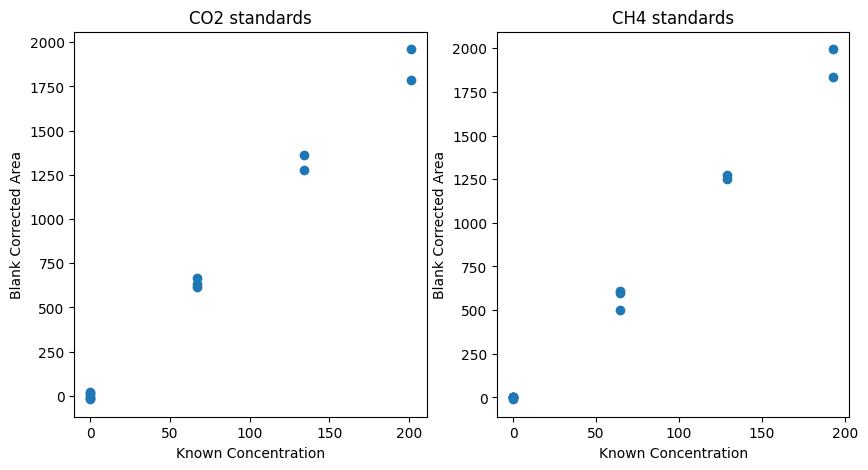

In [ ]:
#visulaly check
#plot blank corr peak area (y) vs known conc (x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(CO2_standards['Known Concentration'], CO2_standards['Blank Corrected Area'])
ax1.set_xlabel('Known Concentration')
ax1.set_ylabel('Blank Corrected Area')
ax1.set_title('CO2 standards')

ax2.scatter(CH4_standards['Known Concentration'], CH4_standards['Blank Corrected Area'])
ax2.set_xlabel('Known Concentration')
ax2.set_ylabel('Blank Corrected Area')
ax2.set_title('CH4 standards')

In [ ]:
#if removed any outliers or NaN values they need to be removed
CO2_standards_clean = CO2_standards.dropna(subset=['Blank Corrected Area'])
CH4_standards_clean = CH4_standards.dropna(subset=['Blank Corrected Area'])

#find linear regression of blank corr peak area vs known conc and list correlation r^2 value

CO2_lin_reg = np.polyfit(CO2_standards_clean['Known Concentration'], CO2_standards_clean['Blank Corrected Area'], 1)
CH4_lin_reg = np.polyfit(CH4_standards_clean['Known Concentration'], CH4_standards_clean['Blank Corrected Area'], 1)

print("CO2 lin reg:", CO2_lin_reg)
print("CH4 lin reg:", CH4_lin_reg)

#find R-squred values
CO2_predicted = np.polyval(CO2_lin_reg, CO2_standards_clean['Known Concentration'])
CH4_predicted = np.polyval(CH4_lin_reg, CH4_standards_clean['Known Concentration'])

CO2_r_squared = r2_score(CO2_standards_clean['Blank Corrected Area'], CO2_predicted)
CH4_r_squared = r2_score(CH4_standards_clean['Blank Corrected Area'], CH4_predicted)

print("CO2 R-squared:", CO2_r_squared)
print("CH4 R-squared:", CH4_r_squared)


CO2 lin reg: [9.45296043 5.4626859 ]
CH4 lin reg: [  9.89300409 -16.37390224]
CO2 R-squared: 0.9955150416143541
CH4 R-squared: 0.9953621891503909


In [ ]:
#find concentration of samples using linear regression

CO2_samples = CO2_all[CO2_all['Identifier 1'].isin(['blank', '0.5mL mix', '1mL mix', '1.5mL mix', 'blank He', 'NBS 18', 'NBS 19', 'UTM']) == False].copy()
CH4_samples = CH4_all[CH4_all['Identifier 1'].isin(['blank', '0.5mL mix', '1mL mix', '1.5mL mix', 'blank He', 'NBS 18', 'NBS 19', 'UTM']) == False].copy()

m_CO2 = CO2_lin_reg[0] #slope
b_CO2 = CO2_lin_reg[1] #intercept

m_CH4 = CH4_lin_reg[0]
b_CH4 = CH4_lin_reg[1]

CO2_samples.loc[:, 'Calculated Concentration (nmols)'] = (CO2_samples['Blank Corrected Area'] - b_CO2) / m_CO2
CH4_samples.loc[:, 'Calculated Concentration (nmols)'] = (CH4_samples['Blank Corrected Area'] - b_CH4) / m_CH4

CO2_samples.head()
# CH4_samples.head()


,Row,Identifier 1,Identifier 2,Comment,Peak Nr,Area All_x,Ampl 44,Ampl 45,Ampl 46,Area 44,...,d 18O/16O,Information,Date,Time,Time Code,BGD 44,BGD 45,BGD 46,Blank Corrected Area,Calculated Concentration (nmols)
51,9,-40.81,NaN,NaN,4,2008.826,34817,40502,48645,1977.567,...,38.076,Peak Center found at (61953);Inject Sample No 9,05/03/25,00:21:55,2025/05/03 00:21:55,12.6,15.7,68.5,1798.103667,189.638050
63,11,IB Cave,NaN,NaN,4,5033.198,49915,49980,49918,4965.831,...,-204.784,Peak Center found at (61943);Inject Sample No 11,05/03/25,02:22:25,2025/05/03 02:22:25,15.3,18.9,82.4,4822.475667,509.577187
69,12,IB Cave,NaN,NaN,4,1345.776,22467,26522,31262,1324.639,...,35.995,Peak Center found at (61963);Inject Sample No 12,05/03/25,03:22:41,2025/05/03 03:22:41,19.3,23.7,100.3,1135.053667,119.496002
75,13,GFO Cave,NaN,NaN,4,966.416,17187,20328,24029,951.205,...,35.580,Peak Center found at (61953);Inject Sample No 13,05/03/25,04:22:56,2025/05/03 04:22:56,21.0,25.7,101.0,755.693667,79.364659
81,14,GFB Cave,NaN,NaN,4,1161.372,19048,22538,26593,1143.089,...,34.514,Peak Center found at (61953);Inject Sample No 14,05/03/25,05:23:11,2025/05/03 05:23:11,25.2,30.6,109.3,950.649667,99.988463


In [ ]:
#correcting isotope values - will just use CO2 peak to corr standards and find linear reg, then apply lin reg to sample CO2 and CH4 peak

#isolate NBS/UTM/blanks/-40 into smaller frame
CO2_iso_stds = CO2_all[CO2_all['Identifier 1'].isin(['blank', 'NBS 18', 'NBS 19', 'UTM', '-40.81'])].copy()
CO2_iso_stds = CO2_iso_stds.iloc[1:]  #drops first blank

#USE AS NEEDED
#I always comment these out then run the cell --> look through CO2_iso_stds for outliers --> come back here and drop
#you have to do it here so the outliers get dropped before averaging
#drop any outlier values - need to use specific value listed in order to drop it (theres probably a better way to do this)
CO2_iso_stds = CO2_iso_stds[CO2_iso_stds['d 13C/12C'] != -1.855]
CO2_iso_stds = CO2_iso_stds[CO2_iso_stds['d 13C/12C'] != -33.291]
CO2_iso_stds = CO2_iso_stds[CO2_iso_stds['d 13C/12C'] != 2.349]
CO2_iso_stds = CO2_iso_stds[CO2_iso_stds['d 13C/12C'] != 5.137]
CO2_iso_stds = CO2_iso_stds[CO2_iso_stds['d 13C/12C'] != -4.051]
CO2_iso_stds = CO2_iso_stds[CO2_iso_stds['d 13C/12C'] != -1.573]
CO2_iso_stds = CO2_iso_stds[CO2_iso_stds['d 13C/12C'] != 53.821]

#find blank d13C value average
#d13C_avg_blank does not include first blank but any other dropped blanks need to be listed above using d13C values
d13C_avg_blank = CO2_iso_stds['d 13C/12C'].mean()

#find avg NBS 18/19 and UTM d13C and standard deviation
NBS_18_avg_d13C = CO2_iso_stds[CO2_iso_stds['Identifier 1']=='NBS 18']['d 13C/12C'].mean()
NBS_19_avg_d13C = CO2_iso_stds[CO2_iso_stds['Identifier 1']=='NBS 19']['d 13C/12C'].mean()
UTM_avg_d13C = CO2_iso_stds[CO2_iso_stds['Identifier 1']=='UTM']['d 13C/12C'].mean()
fourty_avg_d13C = CO2_iso_stds[CO2_iso_stds['Identifier 1']=='-40.81']['d 13C/12C'].mean()

NBS_18_std_d13C = CO2_iso_stds[CO2_iso_stds['Identifier 1']=='NBS 18']['d 13C/12C'].std()
NBS_19_std_d13C = CO2_iso_stds[CO2_iso_stds['Identifier 1']=='NBS 19']['d 13C/12C'].std()
UTM_std_d13C = CO2_iso_stds[CO2_iso_stds['Identifier 1']=='UTM']['d 13C/12C'].std()
fourty_std_d13C = CO2_iso_stds[CO2_iso_stds['Identifier 1']=='-40.81']['d 13C/12C'].std()

#find avg NBS 18/19 and UTM peak area and std - this is helpful bc typically outliers have low peak areas
NBS_18_avg_peak_area = CO2_iso_stds[CO2_iso_stds['Identifier 1']=='NBS 18']['Area All_x'].mean()
NBS_19_avg_peak_area = CO2_iso_stds[CO2_iso_stds['Identifier 1']=='NBS 19']['Area All_x'].mean()
UTM_avg_peak_area = CO2_iso_stds[CO2_iso_stds['Identifier 1']=='UTM']['Area All_x'].mean()
fourty_avg_peak_area = CO2_iso_stds[CO2_iso_stds['Identifier 1']=='-40.81']['Area All_x'].mean()

NBS_18_std_peak_area = CO2_iso_stds[CO2_iso_stds['Identifier 1']=='NBS 18']['Area All_x'].std()
NBS_19_std_peak_area = CO2_iso_stds[CO2_iso_stds['Identifier 1']=='NBS 19']['Area All_x'].std()
UTM_avg_std_area = CO2_iso_stds[CO2_iso_stds['Identifier 1']=='UTM']['Area All_x'].std()
fourty_std_peak_area = CO2_iso_stds[CO2_iso_stds['Identifier 1']=='-40.81']['Area All_x'].std()

print('d13C blank avg:', d13C_avg_blank)

print('NBS 18 avg:', NBS_18_avg_d13C)
print('NBS 19 avg:', NBS_19_avg_d13C)
print('UTM avg:', UTM_avg_d13C)
print('neg 40 avg:', fourty_avg_d13C)

print('NBS 18 std:', NBS_18_std_d13C)
print('NBS 19 std:', NBS_19_std_d13C)
print('UTM std:', UTM_std_d13C)
print('neg 40 std:', fourty_std_d13C)

print('NBS 18 avg peak area:', NBS_18_avg_peak_area)
print('NBS 19 avg peak area:', NBS_19_avg_peak_area)
print('UTM avg peak area:', UTM_avg_peak_area)
print('neg 40 avg peak area:', fourty_avg_peak_area)

print('NBS 18 std peak area:', NBS_18_std_peak_area)
print('NBS 19 std peak area:', NBS_19_std_peak_area)
print('UTM std peak area:', UTM_avg_std_area)
print('neg 40 std peak area:', fourty_std_peak_area)

CO2_iso_stds


d13C blank avg: -12.036
NBS 18 avg: -5.8845
NBS 19 avg: -0.18400000000000002
UTM avg: 2.444
neg 40 avg: -35.1875
NBS 18 std: 0.49851028073651604
NBS 19 std: 0.8428712831743647
UTM std: nan
neg 40 std: 1.0132840174403275
NBS 18 avg peak area: 1770.505
NBS 19 avg peak area: 1749.0839999999998
UTM avg peak area: 1539.48
neg 40 avg peak area: 1943.725
NBS 18 std peak area: 145.02477239423615
NBS 19 std peak area: 351.21852400179586
UTM std peak area: nan
neg 40 std peak area: 92.06671712405087


,Row,Identifier 1,Identifier 2,Comment,Peak Nr,Area All_x,Ampl 44,Ampl 45,Ampl 46,Area 44,d 13C/12C,d 18O/16O,Information,Date,Time,Time Code,BGD 44,BGD 45,BGD 46,Blank Corrected Area
9,2,blank,NaN,NaN,4,213.047,3522,4198,5004,209.663,-11.006,53.351,Peak Center found at (61963);Inject Sample No 2,05/02/25,17:20:08,2025/05/02 17:20:08,8.7,11.0,56.4,2.324667
33,6,NBS 18,NaN,NaN,4,1667.957,30727,36765,43006,1641.455,-6.237,39.806,Peak Center found at (61953);Inject Sample No 6,05/02/25,21:21:09,2025/05/02 21:21:09,12.5,15.7,73.0,1457.234667
39,7,NBS 19,NaN,NaN,4,1997.433,34157,41084,47105,1965.649,-0.780,37.217,Peak Center found at (61973);Inject Sample No 7,05/02/25,22:21:24,2025/05/02 22:21:24,12.6,15.9,71.2,1786.710667
51,9,-40.81,NaN,NaN,4,2008.826,34817,40502,48645,1977.567,-35.904,38.076,Peak Center found at (61953);Inject Sample No 9,05/03/25,00:21:55,2025/05/03 00:21:55,12.6,15.7,68.5,1798.103667
57,10,blank,NaN,NaN,4,191.756,3248,3863,4567,188.726,-11.725,34.021,Peak Center found at (61953);Inject Sample No 10,05/03/25,01:22:10,2025/05/03 01:22:10,7.1,9.2,69.0,-18.966333
153,26,blank,NaN,NaN,4,226.733,3739,4444,5252,223.151,-12.889,34.988,Peak Center found at (61953);Inject Sample No 26,05/03/25,17:26:17,2025/05/03 17:26:17,7.3,9.5,66.0,16.010667
237,40,blank,NaN,NaN,4,200.493,3229,3838,4576,197.318,-13.390,44.718,Peak Center found at (61953);Inject Sample No 40,05/04/25,07:29:57,2025/05/04 07:29:57,7.1,9.3,50.5,-10.229333
285,48,NBS 18,NaN,NaN,4,1873.053,33628,40265,46831,1843.304,-5.532,38.114,Peak Center found at (61963);Inject Sample No 48,05/04/25,15:32:02,2025/05/04 15:32:02,12.6,16.0,72.4,1662.330667
291,49,NBS 19,NaN,NaN,4,1500.735,24999,30104,34916,1476.791,0.412,39.922,Peak Center found at (61963);Inject Sample No 49,05/04/25,16:32:18,2025/05/04 16:32:18,15.3,19.2,78.8,1290.012667
297,50,UTM,NaN,NaN,4,1539.480,28112,33912,39218,1514.895,2.444,38.169,Peak Center found at (61963);Inject Sample No 50,05/04/25,17:32:34,2025/05/04 17:32:34,14.3,18.1,88.0,1328.757667


In [ ]:
#remove blanks from CO2_all - using all instead of CO2_iso_stds bc some standards may have been dropped
CO2_all = CO2_all[CO2_all['Identifier 1'].isin(['NBS 18', 'NBS 19', 'UTM', '-40.81']) == True]

#slim to specified columns
CO2_all = CO2_all[['Row', 'Identifier 1','Peak Nr', 'Area All_x', 'Ampl  44', 'd 13C/12C', 'Blank Corrected Area']]

#This is just for bookkeeping so when you export the final excel you can see what was dropped
#note if any values were dropped
CO2_all['Dropped?'] = False #automatically sets row to False
#USE AS NEEDED
rows_dropped = [45, 503, 485, 491, 497] #list row that was dropped from averages - need to use index value not row #
CO2_all.loc[rows_dropped, 'Dropped?'] = True

CO2_all

,Row,Identifier 1,Peak Nr,Area All_x,Ampl 44,d 13C/12C,Blank Corrected Area,Dropped?
33,6,NBS 18,4,1667.957,30727,-6.237,1457.234667,False
39,7,NBS 19,4,1997.433,34157,-0.780,1786.710667,False
45,8,UTM,4,484.640,8653,-1.855,273.917667,True
51,9,-40.81,4,2008.826,34817,-35.904,1798.103667,False
285,48,NBS 18,4,1873.053,33628,-5.532,1662.330667,False
291,49,NBS 19,4,1500.735,24999,0.412,1290.012667,False
297,50,UTM,4,1539.480,28112,2.444,1328.757667,False
303,51,-40.81,4,1878.624,31648,-34.471,1667.901667,False
485,81,NBS 18,4,1444.169,25148,-4.051,1233.446667,True
491,82,NBS 19,4,1462.799,26191,2.349,1252.076667,True


In [ ]:
#make new dataframe with just averages

iso_data = {
       'Identifier 1': ['avg NBS 18', 'avg NBS 19', 'avg UTM', 'avg neg fourty'],
       'Avg d13C': [NBS_18_avg_d13C, NBS_19_avg_d13C, UTM_avg_d13C, fourty_avg_d13C],
       'Std d13C': [NBS_18_std_d13C, NBS_19_std_d13C, UTM_std_d13C, fourty_std_d13C],
       'Avg Peak Area': [NBS_18_avg_peak_area, NBS_19_avg_peak_area, UTM_avg_peak_area, fourty_avg_peak_area],
       'Std Peak Area': [NBS_18_std_peak_area, NBS_19_std_peak_area, UTM_avg_std_area, fourty_std_peak_area]
       }

iso_std_avgs = pd.DataFrame(iso_data)

iso_std_avgs

,Identifier 1,Avg d13C,Std d13C,Avg Peak Area,Std Peak Area
0,avg NBS 18,-5.8845,0.498510,1770.505,145.024772
1,avg NBS 19,-0.1840,0.842871,1749.084,351.218524
2,avg UTM,2.4440,NaN,1539.480,NaN
3,avg neg fourty,-35.1875,1.013284,1943.725,92.066717


In [ ]:
#find fraction blank
iso_std_avgs['Fraction Blank'] = CO2_avg_blank / iso_std_avgs['Avg Peak Area']

#find fraction sample
iso_std_avgs['Fraction Sample'] = 1 - iso_std_avgs['Fraction Blank']

#blank corr standards
iso_std_avgs['Blank Corrected Avg d13C'] = (iso_std_avgs['Avg d13C'] - iso_std_avgs['Fraction Blank'] * d13C_avg_blank) / iso_std_avgs['Fraction Sample']

#map known values
iso_map = {'avg NBS 18': -5.014, 'avg NBS 19': 1.95, 'avg UTM': 4.49, 'avg neg fourty': -40.81}
iso_std_avgs['Known d13C'] = iso_std_avgs['Identifier 1'].map(iso_map)

#Here I also look how do black corr d13C compare to known values? are stds high? do I need to go back and drop other samples?
iso_std_avgs

,Identifier 1,Avg d13C,Std d13C,Avg Peak Area,Std Peak Area,Fraction Blank,Fraction Sample,Blank Corrected Avg d13C,Known d13C
0,avg NBS 18,-5.8845,0.498510,1770.505,145.024772,0.119018,0.880982,-5.053449,-5.014
1,avg NBS 19,-0.1840,0.842871,1749.084,351.218524,0.120476,0.879524,1.439468,1.950
2,avg UTM,2.4440,NaN,1539.480,NaN,0.136879,0.863121,4.740325,4.490
3,avg neg fourty,-35.1875,1.013284,1943.725,92.066717,0.108412,0.891588,-38.002578,-40.810


Text(0, 0.5, 'Known d13C')

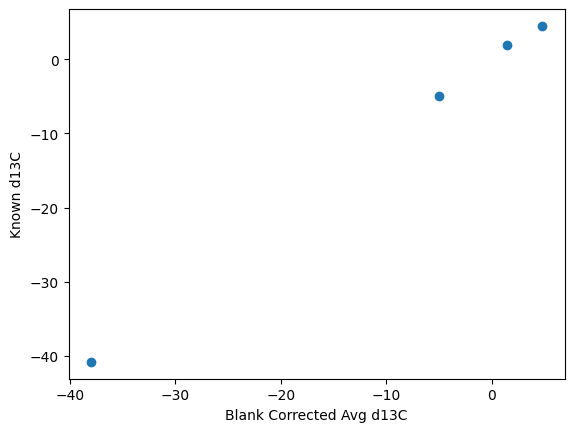

In [ ]:
#visually check
#plot blank corr avg d13C vs known d13C
plt.scatter(iso_std_avgs['Blank Corrected Avg d13C'], iso_std_avgs['Known d13C'])
plt.xlabel('Blank Corrected Avg d13C')
plt.ylabel('Known d13C')

In [ ]:
#d13C linear regression - known (y) measured (x)
#thinking about R^2 as ability of measured (x) variables to predict known (y) variables

iso_lin_reg = np.polyfit(iso_std_avgs['Blank Corrected Avg d13C'], iso_std_avgs['Known d13C'], 1)

print("iso lin reg:", iso_lin_reg)

#find r squared values
iso_predicted = np.polyval(iso_lin_reg, iso_std_avgs['Blank Corrected Avg d13C'])
iso_r_squared = r2_score(iso_std_avgs['Known d13C'], iso_predicted)

print("iso R-squared:", iso_r_squared)


iso lin reg: [1.07183409 0.03530133]
iso R-squared: 0.9994891033482095


In [ ]:
#blank corr samples
CO2_samples['Fraction Blank'] = CO2_avg_blank / CO2_samples['Area All_x']
CO2_samples['Fraction Sample'] = 1 - CO2_samples['Fraction Blank']
CO2_samples['Blank Corrected d13C'] = (CO2_samples['d 13C/12C'] - CO2_samples['Fraction Blank'] * d13C_avg_blank / CO2_samples['Fraction Sample'])

#use lin reg to find corr d13C sample values

m_iso = iso_lin_reg[0] #slope
b_iso = iso_lin_reg[1] #intercept

CO2_samples['PDB corr d13C'] = (CO2_samples['Blank Corrected d13C'] * m_iso) + b_iso  #use this formula for measured (x) known (y)

CO2_samples


,Row,Identifier 1,Identifier 2,Comment,Peak Nr,Area All_x,Ampl 44,Ampl 45,Ampl 46,Area 44,...,Time Code,BGD 44,BGD 45,BGD 46,Blank Corrected Area,Calculated Concentration (nmols),Fraction Blank,Fraction Sample,Blank Corrected d13C,PDB corr d13C
51,9,-40.81,NaN,NaN,4,2008.826,34817,40502,48645,1977.567,...,2025/05/03 00:21:55,12.6,15.7,68.5,1798.103667,189.638050,0.104898,0.895102,-34.493484,-36.935991
63,11,IB Cave,NaN,NaN,4,5033.198,49915,49980,49918,4965.831,...,2025/05/03 02:22:25,15.3,18.9,82.4,4822.475667,509.577187,0.041866,0.958134,-138.776076,-148.709628
69,12,IB Cave,NaN,NaN,4,1345.776,22467,26522,31262,1324.639,...,2025/05/03 03:22:41,19.3,23.7,100.3,1135.053667,119.496002,0.156581,0.843419,-18.258521,-19.534804
75,13,GFO Cave,NaN,NaN,4,966.416,17187,20328,24029,951.205,...,2025/05/03 04:22:56,21.0,25.7,101.0,755.693667,79.364659,0.218045,0.781955,-14.877807,-15.911239
81,14,GFB Cave,NaN,NaN,4,1161.372,19048,22538,26593,1143.089,...,2025/05/03 05:23:11,25.2,30.6,109.3,950.649667,99.988463,0.181443,0.818557,-15.026083,-16.070167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,76,29 ATM 1,NaN,NaN,4,946.345,16538,19681,23048,931.402,...,2025/05/05 19:39:34,18.7,23.2,134.7,735.622667,77.241409,0.222670,0.777330,-8.356235,-8.921196
459,77,29 ATM 2,NaN,NaN,4,872.010,14298,17031,19909,858.244,...,2025/05/05 20:39:50,20.7,25.7,185.2,661.287667,69.377735,0.241651,0.758349,-7.001674,-7.469331
503,84,-40.81,NaN,NaN,4,1168.712,19672,22915,27032,1150.717,...,2025/05/06 03:41:45,57.2,68.8,1207.2,957.989667,100.764939,0.180303,0.819697,-30.643525,-32.809473
515,86,936,NaN,NaN,4,788.198,12487,14856,15981,775.932,...,2025/05/06 05:42:17,17.3,19.1,2269.0,577.475667,60.511518,0.267347,0.732653,-5.798033,-6.179228


In [ ]:
#correct CH4 d13C using lin reg from CO2

#first blank corr
CH4_samples['Fraction Blank'] = CH4_avg_blank / CH4_samples['Area All_x']
CH4_samples['Fraction Sample'] = 1 - CH4_samples['Fraction Blank']
CH4_samples['Blank Corrected d13C'] = (CH4_samples['d 13C/12C'] - CH4_samples['Fraction Blank'] * d13C_avg_blank / CH4_samples['Fraction Sample'])

#use lin reg to find corr d13C sample values

m_iso = iso_lin_reg[0] #slope
b_iso = iso_lin_reg[1] #intercept

CH4_samples['PDB corr d13C'] = (CH4_samples['Blank Corrected d13C'] * m_iso) + b_iso

CH4_samples


,Row,Identifier 1,Identifier 2,Comment,Peak Nr,Area All_x,Ampl 44,Ampl 45,Ampl 46,Area 44,...,Time Code,BGD 44,BGD 45,BGD 46,Blank Corrected Area,Calculated Concentration (nmols),Fraction Blank,Fraction Sample,Blank Corrected d13C,PDB corr d13C
50,9,-40.81,NaN,NaN,3,22.003,365,432,453,21.676,...,2025/05/03 00:21:55,10.6,13.5,133.3,-6.677667,0.980110,1.303489,-0.303489,-63.191779,-67.695802
62,11,IB Cave,NaN,NaN,3,23.474,395,464,485,23.129,...,2025/05/03 02:22:25,10.4,13.3,138.5,-5.206667,1.128801,1.221806,-0.221806,-83.281713,-89.228878
68,12,IB Cave,NaN,NaN,3,46.484,782,916,1014,45.785,...,2025/05/03 03:22:41,15.9,19.8,168.9,17.803333,3.454687,0.617001,0.382999,-4.311344,-4.585744
74,13,GFO Cave,NaN,NaN,3,32.080,556,651,707,31.601,...,2025/05/03 04:22:56,11.4,14.4,137.1,3.399333,1.998709,0.894036,0.105964,79.570472,85.321646
80,14,GFB Cave,NaN,NaN,3,30.280,494,579,605,29.834,...,2025/05/03 05:23:11,12.5,15.8,166.6,1.599333,1.816762,0.947182,0.052818,196.121248,210.244741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,76,29 ATM 1,NaN,NaN,3,30.951,530,621,566,30.516,...,2025/05/05 19:39:34,11.1,14.3,264.3,2.270333,1.884588,0.926647,0.073353,138.659379,148.655151
458,77,29 ATM 2,NaN,NaN,3,30.924,524,614,284,30.539,...,2025/05/05 20:39:50,13.4,17.0,655.0,2.243333,1.881859,0.927457,0.072543,165.580382,177.510000
502,84,-40.81,NaN,NaN,3,31.010,585,696,518,30.582,...,2025/05/06 03:41:45,30.5,38.8,816.7,2.329333,1.890552,0.924884,0.075116,153.433125,164.490156
514,86,936,NaN,NaN,3,18.941,361,431,22,18.714,...,2025/05/06 05:42:17,63.6,66.9,2697.5,-9.739667,0.670599,1.514211,-0.514211,30.314257,32.527155


In [ ]:
#add slope and intercept to df to export
iso_std_avgs['iso slope'] = m_iso
iso_std_avgs['iso intercept'] = b_iso
iso_std_avgs

,Identifier 1,Avg d13C,Std d13C,Avg Peak Area,Std Peak Area,Fraction Blank,Fraction Sample,Blank Corrected Avg d13C,Known d13C,iso slope,iso intercept
0,avg NBS 18,-5.8845,0.498510,1770.505,145.024772,0.119018,0.880982,-5.053449,-5.014,1.071834,0.035301
1,avg NBS 19,-0.1840,0.842871,1749.084,351.218524,0.120476,0.879524,1.439468,1.950,1.071834,0.035301
2,avg UTM,2.4440,NaN,1539.480,NaN,0.136879,0.863121,4.740325,4.490,1.071834,0.035301
3,avg neg fourty,-35.1875,1.013284,1943.725,92.066717,0.108412,0.891588,-38.002578,-40.810,1.071834,0.035301


#Export

In [ ]:
#exporting
output_path = r'5-2-25 run processed python.xlsx'  #remember to change to match uploaded file

with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
  rawData.to_excel(writer, sheet_name='Raw Data', index=False)
  CO2_samples.to_excel(writer, sheet_name='CO2 samples', index=False)
  CH4_samples.to_excel(writer, sheet_name='CH4 samples', index=False)
  CO2_standards.to_excel(writer, sheet_name='CO2 standards', index=False)
  CH4_standards.to_excel(writer, sheet_name='CH4 standards', index=False)
  iso_std_avgs.to_excel(writer, sheet_name='Isotopic Standards', index=False)
  CO2_all.to_excel(writer, sheet_name='All Iso Stds', index=False)

files.download(output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#add to and compare cumulative standards data - all runs

In [ ]:
#blank corr d13C standards from all previous runs
all_iso_stds = pd.read_csv('https://docs.google.com/spreadsheets/d/1QFDoAsD_NqelW6Otu0oQWJgPHYm3S6DSOAiBnwjqsZY/export?format=csv') #public google sheets - access by copying address up to /export
all_iso_stds

,Name,Blank Corrected Avg d13C,known d13C,date
0,avg NBS 18,-5.788820,-5.014,10/11/24
1,avg NBS 19,0.854952,1.950,NaN
2,avg UTM,3.567454,4.490,NaN
3,avg NBS 18,-6.103260,-5.014,10/18/24
4,avg NBS 19,1.334594,1.950,NaN
5,avg UTM,2.979052,4.490,NaN
6,avg NBS 18,-5.522560,-5.014,10/25/24
7,avg NBS 19,1.205209,1.950,NaN
8,avg UTM,2.953752,4.490,NaN
9,avg NBS 18,-6.677680,-5.014,11/8/24


Text(0, 0.5, 'Known d13C')

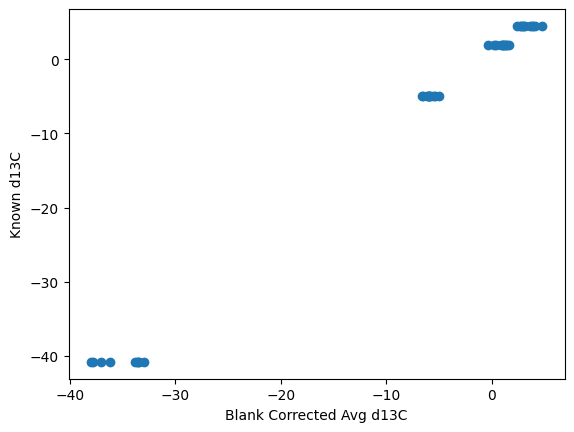

In [ ]:
#joint calibration curve
#visually check
#plot blank corr avg d13C vs known d13C
plt.scatter(all_iso_stds['Blank Corrected Avg d13C'], all_iso_stds['known d13C'])
plt.xlabel('Blank Corrected Avg d13C')
plt.ylabel('Known d13C')

In [ ]:
#slope
#d13C linear regression - known (y) measured (x)
#thinking about R^2 as ability of measured (x) variables to predict known (y) variables

iso_lin_reg = np.polyfit(all_iso_stds['Blank Corrected Avg d13C'], all_iso_stds['known d13C'], 1)

print("iso lin reg:", iso_lin_reg)

#find r squared values
iso_predicted = np.polyval(iso_lin_reg, all_iso_stds['Blank Corrected Avg d13C'])
iso_r_squared = r2_score(all_iso_stds['known d13C'], iso_predicted)

#store slope and intercept
m_iso = iso_lin_reg[0] #slope
b_iso = iso_lin_reg[1] #intercept

print("iso R-squared:", iso_r_squared)
print(m_iso)
print(b_iso)

iso lin reg: [1.17635406 1.01372237]
iso R-squared: 0.9940278140850354
1.1763540569281854
1.013722369898345
